# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type

#urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

#suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

#rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

#urban_ride_count = urban_cities_df.groupby(["type"] == "Urban").count()["ride_id"]
#suburban_ride_count = suburban_cities_df.groupby(["type"] == "Suburban").count()["ride_id"]
# rural_ride_count = rural_cities_df.groupby(["type"] == "Rural").count()["ride_id"]
# urban_ride_count
# suburban_ride_count
# rural_ride_count

total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# 2. Get the total drivers for each city type
#urban_drivers_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# suburban_drivers_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

# rural_drivers_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# urban_driver_count = urban_drivers_df.groupby(["type"] == "Urban").count()["driver_count"]
# suburban_driver_count = suburban_drivers_df.groupby(["type"] == "Suburban").count()["driver_count"]
# rural_driver_count = rural_drivers_df.groupby(["type"] == "Rural").count()["driver_count"]
# urban_driver_count
# suburban_driver_count
# rural_driver_count

total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

######something here is wrong. neither sum nor count is correct. should be:
#rural 78
#suburban 490
#urban 2,405

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
#total_fares = pyber_data_df.groupby(["type"]).sum()["fare":('$%1.2f')]
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
total_avg_fares = pyber_data_df.groupby(["type"]).mean()["fare"]
total_avg_fares

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
#avg_driver_fare = pyber_data_df.groupby(["driver_count"]).mean()["fare"]
#avg_driver_fare
avg_type_fares = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_type_fares

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
#pyber_summary_df.describe()
#pyber_data_df.describe()
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": total_avg_fares,
    "Average Fare per Driver": avg_type_fares
})
pyber_summary_df.describe()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,791.666667,991.000000,21179.546667,30.039780,30.039780
std,763.762616,1241.766081,17833.262507,5.112718,5.112718
min,125.000000,78.000000,4327.930000,24.525772,24.525772
25%,375.000000,284.000000,11842.130000,27.747950,27.747950
50%,625.000000,490.000000,19356.330000,30.970128,30.970128
75%,1125.000000,1447.500000,29605.355000,32.796784,32.796784
max,1625.000000,2405.000000,39854.380000,34.623440,34.623440


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,34.623440
Suburban,625,490,19356.33,30.970128,30.970128
Urban,1625,2405,39854.38,24.525772,24.525772


In [12]:
#  8. Format the columns.

#pyber_summary_df["Total Fares"] = "$" + pyber_summary_df["Total Fares"].astype()
#pyber_summary_df
pyber_summary_df["Average Fare per Driver"]= pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Ride"]= pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Total Fares"]= pyber_summary_df["Total Fares"].map("${:.2f}".format)
#pyber_summary_df["Total Fares"]= pyber_summary_df["Total Fares"]:("${:,.2}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.62,$34.62
Suburban,625,490,$19356.33,$30.97,$30.97
Urban,1625,2405,$39854.38,$24.53,$24.53


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.62,$34.62
Suburban,625,490,$19356.33,$30.97,$30.97
Urban,1625,2405,$39854.38,$24.53,$24.53


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_group = pyber_data_df.groupby(by = ["type", "date"])
farebydate = type_date_group["fare"].sum()
farebydate

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
farebydate = farebydate.reset_index()
farebydate["date"]=pd.to_datetime(farebydate["date"])

In [28]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
newdatefares = farebydate.pivot(index="date", columns="type", values="fare")
newdatefares

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

specificdates = newdatefares.loc["2019-01-01" : "2019-04-29"]
specificdates

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
#already done in step3
newdatefares

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [19]:
# 7. Check that the datatype for the index is datetime using df.info()

newdatefares.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 154.2 KB


In [40]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
#farebyweek = newdatefares.groupby("date").resample("W")["fare"].count()

#farebyweek = newdatefares.groupby('date').resample('W')[index='fare'].count()
#farebyweek = newdatefares.groupby('date').resample('W').sum()
farebyweek = newdatefares.resample('W').sum()
farebyweek.head(20)


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


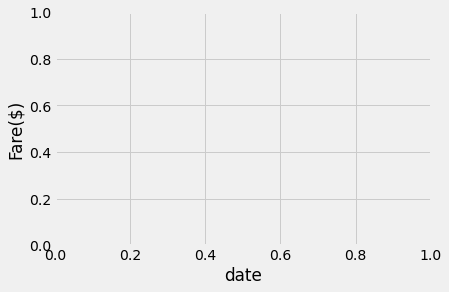

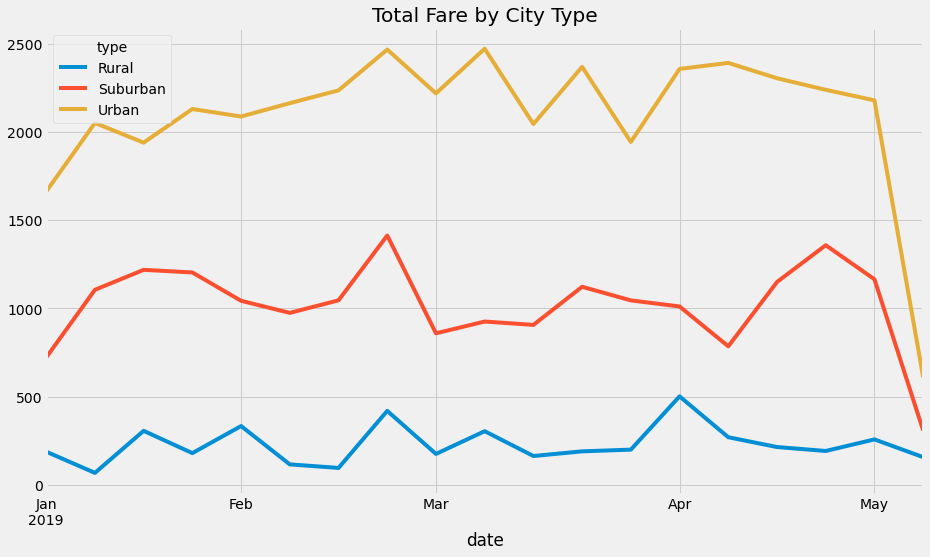

In [42]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

#farebyweek.plot()


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.xlabel("date")
plt.ylabel("Fare($)")
#fig, ax = plt.subplots(figsize=(14,8))
#ax=farebyweek.plot()
farebyweek.plot(figsize=(14,8))


#Create a title
plt.title("Total Fare by City Type")

plt.savefig("analysis/PyBer_fare_summary.png")